# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [19]:
import numpy as np
import h5py

In [20]:
filename = "training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

In [21]:
filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

In [22]:
filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

In [23]:
train_images.shape

(2726, 28, 28, 3)

In [24]:
test_images_1.shape

(3147, 28, 28, 3)

In [25]:
test_images_2.shape

(3147, 28, 28, 3)

In [26]:
train_digits.shape

(2726,)

In [27]:
test_digits_1.shape

(3147,)

In [28]:
test_digits_2.shape

(3147,)

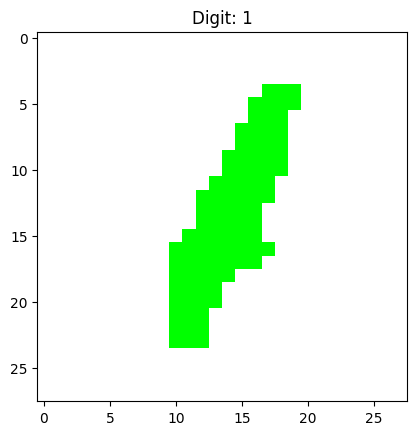

In [29]:
import matplotlib.pyplot as plt

index = 1000
image_to_visualize = train_images[index]

# Display the image
plt.imshow(image_to_visualize)
plt.title(f"Digit: {train_digits[index]}")  # Assuming you have digit labels
plt.show()

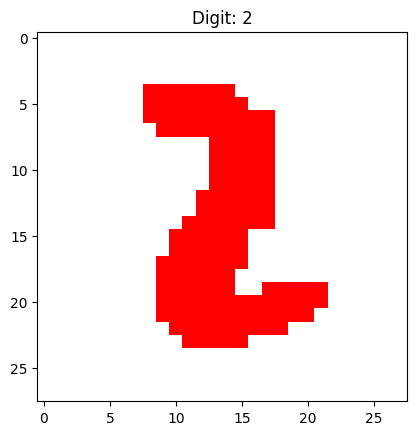

In [30]:
image_to_visualize = test_images_1[index]

# Display the image
plt.imshow(image_to_visualize)
plt.title(f"Digit: {test_digits_1[index]}")  # Assuming you have digit labels
plt.show()

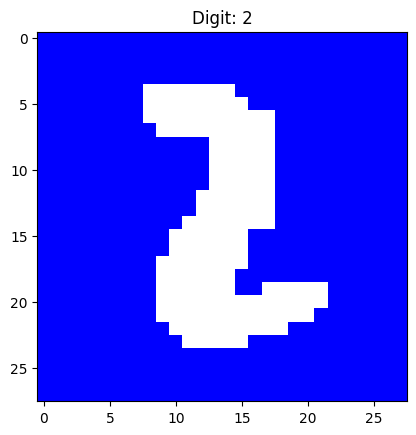

In [31]:
image_to_visualize = test_images_2[index]

# Display the image
plt.imshow(image_to_visualize)
plt.title(f"Digit: {test_digits_2[index]}")  # Assuming you have digit labels
plt.show()

In [32]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Reshape the images to a 2D array for MLP input
train_images_reshaped = train_images.reshape((2726, -1))
test_images_1_reshaped = test_images_1.reshape((3147, -1))
test_images_2_reshaped = test_images_2.reshape((3147, -1))

# Create MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp.fit(train_images_reshaped, train_digits)

# Make predictions on test sets
predictions_1 = mlp.predict(test_images_1_reshaped)
predictions_2 = mlp.predict(test_images_2_reshaped)

# Calculate accuracy
accuracy_1 = accuracy_score(test_digits_1, predictions_1)
accuracy_2 = accuracy_score(test_digits_2, predictions_2)

print(f"Accuracy on test set 1: {accuracy_1:.2%}")
print(f"Accuracy on test set 2: {accuracy_2:.2%}")


Accuracy on test set 1: 100.00%
Accuracy on test set 2: 0.00%


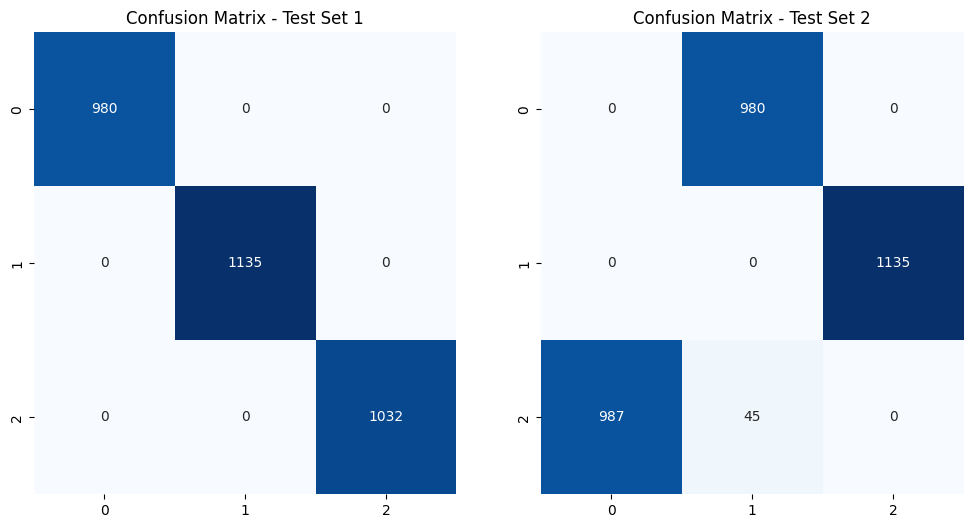

In [33]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrices
cm_1 = confusion_matrix(test_digits_1, predictions_1)
cm_2 = confusion_matrix(test_digits_2, predictions_2)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Set 1')

plt.subplot(1, 2, 2)
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Set 2')

plt.show()
